# Data Collection of Tweets

In [1]:
import GetOldTweets3 as got
import pandas as pd

In [7]:
#Twitter Handle
username = 'elonmusk'
#GetOldTweets can only collect a max of 10000 tweets at a time
count = 10000

#Creation of query object
tweetCriteria = got.manager.TweetCriteria().setUsername(username).setMaxTweets(count).setEmoji("unicode").setSince("2020-6-01").setUntil("2020-8-3")
#Creation of list that contains  all tweets
tweets = got.manager.TweetManager.getTweets(tweetCriteria)

#creating list of chosen tweet data
user_tweets = [[tweet.date, tweet.text, tweet.retweets, tweet.favorites] for tweet in tweets]
#Save to DataFrame
tweets = pd.DataFrame(user_tweets)
#Save to Json
tweets.to_json('data/elonmusk10.json')

In [8]:
#Lets Look at the Tweets 
tweets.head(10)

,0,1,2,3
0,2020-08-02 23:20:53+00:00,"Nosecone closing is recommended, but not required, for safe entry",67,2339
1,2020-08-02 22:45:07+00:00,"When space travel becomes as common as air travel, the future of civilization will be assured",23761,212331
2,2020-08-02 21:35:05+00:00,Space is the new air,1026,14007
3,2020-08-02 20:27:25+00:00,Congratulations @SpaceX &amp; @NASA on completing first crewed Dragon flight!! 🇺🇸 returned.,18489,204600
4,2020-08-02 18:51:04+00:00,Dragon is stable in the water,16478,261192
5,2020-08-02 18:37:24+00:00,Acquisition of signal expected in 5 mins,629,16759
6,2020-08-02 18:31:53+00:00,4 mins to Dragon loss of signal due to atmospheric entry plasma,2674,53288
7,2020-08-02 18:11:01+00:00,Dragon will travel from south of New Zealand to Florida in ~37 minutes,9499,136140
8,2020-08-02 17:19:04+00:00,Coming in hot,2663,31283
9,2020-08-02 16:55:30+00:00,Astronauts land in 2 hours @NASA @SpaceX,8952,118337


# Tweet Data Wrangling

In [9]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)

In [10]:
df = pd.read_json('data/elonmusk10.json')

In [11]:
#rename columns 
df.rename(columns={0: 'date', 1: \
                   'tweet', 2: 'retweet_count', 3: 'fav_count'}, inplace=True)

In [12]:
#Change timestamp to datetime format 
df['date'] = pd.to_datetime(df['date'], unit='ms')
df['date'] = pd.to_datetime(df['date']).dt.date

In [13]:
df.tail()

,date,tweet,retweet_count,fav_count
706,2020-06-02,Off Twitter for a while,31937,564842
707,2020-06-01,Starship is the key to making life multiplanetary & protecting the light of consciousness,2282,35878
708,2020-06-01,Well said,474,11581
709,2020-06-01,Definitely not right that the other officers were charged with nothing. What message does this send in general to officers who stand by while another does wrong? #JusticeForGeorge,1362,9835
710,2020-06-01,Where’s the banana!?,1570,68253


In [14]:
#Load in second data to collect missing tweets 
df1 = pd.read_json('data/elonmusk4.json')

In [15]:
#rename columns 
df1.rename(columns={0: 'date', 1: \
                   'tweet', 2: 'retweet_count', 3: 'fav_count'}, inplace=True)

#Change timestamp to datetime format 
df1['date'] = pd.to_datetime(df1['date'], unit='ms')
df1['date'] = pd.to_datetime(df1['date']).dt.date

In [20]:
#Limit to OldTweets as it only Collects up to 10000 so we shall append the data 
df1.head(15)
len(df1)

9819

In [27]:
df1.loc[11:,:]

,date,tweet,retweet_count,fav_count
11,2020-05-31,Nine years later,38050,410228
12,2020-05-31,Must be due to relativistic aging 😉,108,3492
13,2020-05-31,Brought home by same person who placed it there almost a decade ago,805,17465
14,2020-05-31,"Спасибо, сэр, ха-ха. Мы рассчитываем на взаимовыгодное и процветающее долгосрочное сотрудничество. - Elon",1637,11717
15,2020-05-31,Congratulations Bob & Doug on docking & hatch opening on @Space_Station!,6033,76705
...,...,...,...,...
9814,2011-12-03,That was a total non sequitur btw,4,7
9815,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.",25,29
9816,2011-12-01,I made the volume on the Model S http://ow.ly/i/mtD7 go to 11. Now I just need to work in a miniature Stonehenge...,8,23
9817,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)",18,165


In [29]:
df.tail()

,date,tweet,retweet_count,fav_count
706,2020-06-02,Off Twitter for a while,31937,564842
707,2020-06-01,Starship is the key to making life multiplanetary & protecting the light of consciousness,2282,35878
708,2020-06-01,Well said,474,11581
709,2020-06-01,Definitely not right that the other officers were charged with nothing. What message does this send in general to officers who stand by while another does wrong? #JusticeForGeorge,1362,9835
710,2020-06-01,Where’s the banana!?,1570,68253


In [30]:
#Create variable to add on missing tweets 
addOn = df1.loc[11:,:]

In [31]:
#Append on to df
tweetDF = df.append(addOn).reset_index(drop=True)

In [36]:
len(tweetDF)

10519

In [37]:
#Regex To classsify Business or personal before classifying Manually 
import re

In [40]:
#regex to classify if was business or personal
#Classifying business or personal tweets  
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text, re.I)
    if match:
        return 1
    return 0

In [41]:
#Regex to do a quick classify of biz vs personal tweets 
tweetDF['tweetBiz'] = tweetDF['tweet'].apply(lambda tweet: word_in_text(r'(tesla|\
Model Y|Model X|stock|Model S|SN4|SpaceX|economy|Space Station|Falcon|IPO|\
Dragon|engines|cars|Grasshopper|Nintendo|Dragon spacecraft|carbon tax|thrusters|\
solar|solar power|F9|Rocket|booster|Roadster|Gigafactory|Model W|Dragon|FAA|\
regulatory approval|China|SolarCity|President|White House|NASA|8.1|X and S|Model 3|\
[0-9]|product|software version|Cybertruck|Regulatory approval|Boring Company|starlink|\
roadsters|Jim Cramer|Hopper|Autopilot|OpenAI|Sentry mode|super chargers|\
CH4 hydrogen cars|FOIA|short-sellers|BFR|GOP|HyperLoop|X.com|Rocket Fairing|\
Thai Cave rescue|LopezLinnete|420|sentient seats| skylab|Gary the Snail|\
Teslaquilla bottles|Delta IV|Not a flamethrower|neural net|HG2G|FAA|\
NK|EV adoption electric vehicles|RHD|Solary City|P100D|vw kombi tesla|\
lz 1 2 landing zone|grass hopper|super draco)', tweet))

In [42]:
#Now to double check the last few entries 
tweetDF.to_excel('tweetsClassify.xlsx')

In [43]:
#classify manually after regex
#1 is tweetBiz 0 is Personal 
# df = pd.read_excel('data/tweetsClassify.xlsx', index_col = False)
# df = df.drop(columns = 'Unnamed: 0')

In [48]:
df = pd.read_json('data/tweetdataV7.json')

In [49]:
#Add Sentiment 
#use sentiment analyzer 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def vader_compound(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [50]:
#Replace np.nan to None 
df['tweet'] = df['tweet'].replace(np.nan, 'None')
df['tweet'] = df['tweet'].replace('None', '')

In [51]:
#Apply Compound score
df['compound'] = df['tweet'].apply(vader_compound)

In [52]:
#Positive Negative Neutral Classification
def sentiment(compound):
  if compound >= 0.05:
    return 'positive'
  elif compound <= -0.05:
    return 'negative'
  else:
    return 'neutral'

In [53]:
#Add sentiment Column 
df['sentiment'] = df['compound'].apply(lambda x: sentiment(x))

In [54]:
#Add Tweet Length
df['tweetLen'] = df['tweet'].apply(lambda x: len(x.split()))

In [55]:
#Drop Blank Tweets that were Images used by Elon we can add Images
#In a future project with a CNN to further stack the model 
df1 = df[df['tweet'] != '']
df1 = df1.reset_index()

In [56]:
#Get rid of strings in classification 
df1['tweetBiz'] = df1['tweetBiz'].replace('1',1)
df1['tweetBiz'] = df1['tweetBiz'].replace('0',0)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

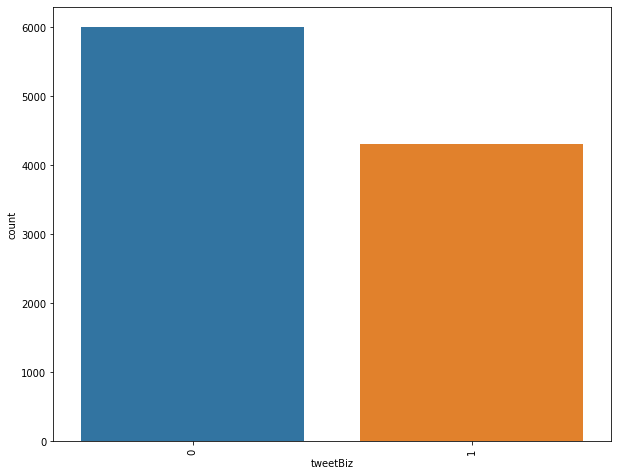

In [59]:
plt.figure(figsize = (10,8))
sns.countplot(df1['tweetBiz'])
plt.xticks(rotation = 90)
plt.show()

In [60]:
#tweetBiz change 1 to Business and 0 to Personal 
df1['tweetBiz'] = np.where(df1['tweetBiz'] == 1, 'Business', 'Personal')

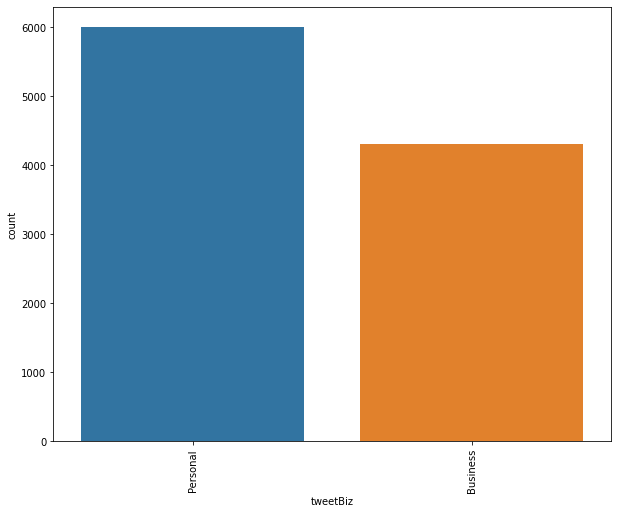

In [61]:
plt.figure(figsize = (10,8))
sns.countplot(df1['tweetBiz'])
plt.xticks(rotation = 90)
plt.show()

In [62]:
#Concat tweetBiz and sentiment 
df1['tweetType'] = df1['tweetBiz'] + ' ' + df1['sentiment']

In [63]:
#Drop unnecssary columns we will add compound later again when we combine the tweets
df1 = df1.drop(columns = ['tweetBiz', 'sentiment'])

In [65]:
df1.tail(10200)

,index,date,tweet,retweet_count,fav_count,cleanTweet,compound,tweetLen,tweetType
93,93,2020-07-26,Great song,108,6321,great song,0.6249,2,Personal positive
94,94,2020-07-26,Haha thanks Kara :),29,1377,haha thanks kara,0.8360,4,Personal positive
95,95,2020-07-26,For sure,57,3336,sure,0.3182,2,Personal positive
96,96,2020-07-26,"Yeah, we’re hunkering down here until the hurricane passes",112,2966,yeah hunkering hurricane passes,0.2960,9,Personal positive
97,97,2020-07-25,Exactly!,49,1228,exactly,0.0000,1,Personal neutral
...,...,...,...,...,...,...,...,...,...
10288,10288,2011-12-03,That was a total non sequitur btw,4,7,total non sequitur btw,0.0000,7,Personal neutral
10289,10289,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.",25,29,great voltaire quote arguably better twain hearing news death voltaire replied reports true premature,0.5994,21,Business positive
10290,10290,2011-12-01,I made the volume on the Model S http://ow.ly/i/mtD7 go to 11. Now I just need to work in a miniature Stonehenge...,8,23,made volume model s go now just need work miniature stonehenge,0.0000,22,Business neutral
10291,10291,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)",18,165,went iceland sat ride bumper cars ice country vlads rink van nuys awesome family fun,0.8588,24,Personal positive


In [67]:
#Drop last row there were too many days without a tweet 
df1 = df1.iloc[:10292,:]

In [68]:
df1 = df1.drop(columns = 'index').reset_index(drop = True)

In [69]:
df1.tail()

,date,tweet,retweet_count,fav_count,cleanTweet,compound,tweetLen,tweetType
10287,2011-12-04,Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.,9,30,reading great biography ben franklin by isaacson highly recommended,0.7346,12,Personal positive
10288,2011-12-03,That was a total non sequitur btw,4,7,total non sequitur btw,0.0000,7,Personal neutral
10289,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.",25,29,great voltaire quote arguably better twain hearing news death voltaire replied reports true premature,0.5994,21,Business positive
10290,2011-12-01,I made the volume on the Model S http://ow.ly/i/mtD7 go to 11. Now I just need to work in a miniature Stonehenge...,8,23,made volume model s go now just need work miniature stonehenge,0.0000,22,Business neutral
10291,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)",18,165,went iceland sat ride bumper cars ice country vlads rink van nuys awesome family fun,0.8588,24,Personal positive


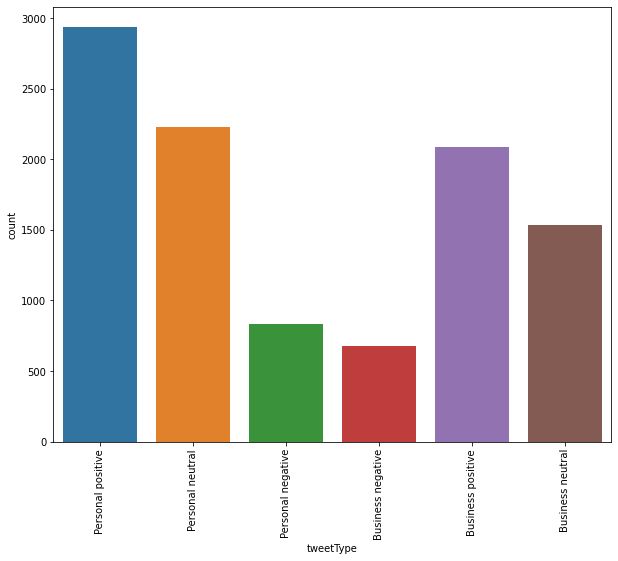

In [70]:
plt.figure(figsize = (10,8))
sns.countplot(df1['tweetType'])
plt.xticks(rotation = 90)
plt.show()

In [71]:
#Now Save dataframe for distilBert Model and tweet visualization 
df1.to_json('data/tweetsDataV7.json')

# Tesla Financial Data

In [72]:
from pandas_datareader import data as wb

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [95]:
#Choose Tesla ticker and load in financial data 
#12-1-2011 to 6-30-2020
ticker = 'TSLA'
stockDF = pd.DataFrame(wb.DataReader(ticker, data_source= 'yahoo',
                                     start = '12-01-2011', end = '8-1-2020'))

In [96]:
#Reset the index
stockDF = stockDF.reset_index()

In [97]:
#Change timestamp to datetime 
x = lambda a : a.date()

stockDF['Date'] = stockDF['Date'].apply(x)
stockDF.rename(columns = {'Date': 'date'}, inplace = True)

In [98]:
stockDF.head()

,date,High,Low,Open,Close,Volume,Adj Close
0,2011-12-01,33.990002,31.980000,32.570000,32.599998,1030200,32.599998
1,2011-12-02,33.689999,32.400002,32.830002,33.299999,802800,33.299999
2,2011-12-05,35.000000,33.430000,33.529999,34.419998,1160100,34.419998
3,2011-12-06,34.980000,34.029999,34.200001,34.869999,951800,34.869999
4,2011-12-07,34.889999,33.799999,34.630001,34.189999,674300,34.189999


In [77]:
#Check Shape
stockDF.shape

(2180, 7)

In [103]:
#for randomforest and xgboost we will move adjusted close back one date
stockDF['Adj Close'] = stockDF['Adj Close'].shift(-1)

In [105]:
stockDF = stockDF.dropna()

In [106]:
stockDF.to_json('data/tslaMLStockV7.json')

In [79]:
#Save Financial Information
#stockDF.to_json('data/tslaStockV7.json')

# Combine Tweet and Financial Data

In [122]:
tweets = pd.read_json('data/tweetsDataV7.json')
fin = pd.read_json('data/tslaMLStockV7.json')

In [123]:
#Aggregate retweet count and fav_count by date, concat tweet and tweetType 
number = tweets.groupby('date').sum().reset_index()
text = tweets.groupby('date')['tweet'].apply(lambda x: ', '.join(x)).reset_index()
tweetType = tweets.groupby('date')['tweetType'].apply(lambda x: ', '.join(x)).reset_index()

In [124]:
#Merge the dataframes together 
df = pd.merge(number, text, how='outer', on='date')
df = pd.merge(df, tweetType, how = 'outer', on = 'date')

In [125]:
#Drop Columns 
df = df.drop(columns = 'compound')

In [126]:
#Do a Count of tweetType of each column make it into 6 columns 
categories = ['Business positive', 'Business neutral', 'Business negative',
              'Personal positive', 'Personal neutral', 'Personal negative']

for x in categories:
  for a in df['tweetType']:
    df[x] = [a.count(x) for a in df['tweetType']]

In [127]:
#Apply Vader Compound score 
df['compound'] = df['tweet'].apply(vader_compound)

In [128]:
#combine tweet data with financial data
elonDF = df.merge(fin, how = 'outer', on = 'date')

In [129]:
elonDF = elonDF.sort_values('date').reset_index(drop = True)

In [130]:
#Add dayOfWeek feature 
import datetime
elonDF['dayOfWeek'] = elonDF['date'].apply(lambda x: x.strftime('%A'))

In [131]:
elonDF.tail()

,date,retweet_count,fav_count,tweetLen,tweet,tweetType,Business positive,Business neutral,Business negative,Personal positive,Personal neutral,Personal negative,compound,High,Low,Open,Close,Volume,Adj Close,dayOfWeek
2707,2020-07-27,154954.0,1337692.0,145.0,"Whether commercial or government, monopolies are bad for the people, Sounds great, Haha, Das Kapital in a nutshell, What I like most is their great sense of humor, The left is losing the middle, Exactly, 🤣🤣, Hold my beer, Once an Onion, now a Rose, Wow, you think about me a lot!, You dropped this, 🌹, Haha, Giga Berlin will come together at an impossible-seeming speed. The prefabricated construction method in Germany is extremely impressive., Almost a decade ago. Original Dragon in background., Ya just can’t beat BR, Planet Claire is 🔥🔥, Fair point! Will discuss with team., He was amazing, Great song, Nickel is the biggest challenge for high-volume, long-range batteries! Australia & Canada are doing pretty well. US nickel production is objectively very lame. Indonesia 🇮🇩 is great!, 🤣🤣, That’s me! Haha, This has a lot of potential. Lithium is pretty much everywhere.","Personal negative, Personal positive, Personal positive, Personal neutral, Personal positive, Personal negative, Personal neutral, Personal neutral, Personal neutral, Personal neutral, Personal positive, Personal neutral, Personal neutral, Personal positive, Business positive, Business positive, Personal neutral, Personal neutral, Personal positive, Personal positive, Personal positive, Business positive, Personal neutral, Personal positive, Business positive",4.0,0.0,0.0,9.0,10.0,2.0,0.9896,1547.939941,1413.000000,1435.0,1539.599976,16048700.0,1476.489990,Monday
2708,2020-07-28,1245.0,28715.0,73.0,"Agreed, Haha, It’s a prototype of the color, And to think I used to like Bernie! 😢, @BernieSanders 🕊🕊, Maybe he’s feeling the bern haha, Fuel spin valve didn’t open. Will fix & try again tomorrow. Also, some odd TVC hydraulic pump behavior., I was just out at the launch pad. Connector damaged in the storm, but fixed now. Might be able to fire tonight or at least get to the next issue.","Personal positive, Personal positive, Personal neutral, Personal negative, Personal neutral, Personal positive, Personal negative, Business negative",0.0,0.0,1.0,3.0,2.0,2.0,-0.1134,1564.699951,1474.420044,1504.0,1476.489990,15808700.0,1499.109985,Tuesday
2709,2020-07-29,5303.0,100007.0,79.0,"😉, Sum > parts, Should add a few miles of range, more in slow traffic, The government has the most money by far. They talk in trillions., Haha no one can ever have our top secret fart technology!!, 💕 💕, Sure, Tesla is open to licensing software and supplying powertrains & batteries. We’re just trying to accelerate sustainable energy, not crush competitors!, What he doesn’t appear to appreciate is that government is just a monopolist corporation in the limit","Personal neutral, Personal neutral, Personal neutral, Personal neutral, Personal positive, Personal neutral, Personal positive, Business positive, Personal positive",1.0,0.0,0.0,3.0,5.0,0.0,0.8756,1534.810059,1487.000000,1501.0,1499.109985,9426900.0,1487.489990,Wednesday
2710,2020-07-30,91933.0,1162051.0,309.0,"Lo Que Construimos, Cool, Starship SN5 just completed full duration static fire. 150m hop soon., 🖤🧛‍♀️Total Eclipse of the Heart 🧛‍♀️🖤, 😮, Not that I’m aware of, Yes. Could also extend range of hearing beyond normal frequencies and amplitudes. Deus Ex., Neuralinks are currently meant for mature brains & functionality is lost if removed. Rewiring of neurons is certainly possible, but won’t make up for loss of the Link., Yes, should be possible to create a neural shunt from motor cortex to microcontrollers in muscle groups & restore movement even if someone has a fully severed spinal cord. First part has already been demonstrated with Utah array, but not as an outpatient device., Will show neurons firing in real-time on August 28th. The matrix in the matrix., They don’t fire all at onc

In [132]:
#Visualize To see if we wrangled everything correctly 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

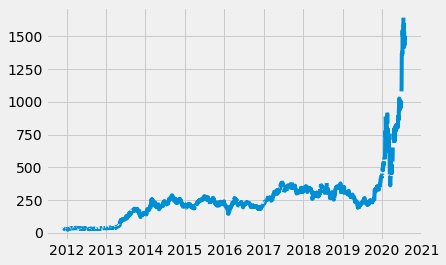

In [133]:
plt.plot(elonDF['date'], elonDF['Adj Close']);

In [134]:
elonDF.to_json('data/elonMLDFV7.json')

In [121]:
len(elonDF)

2712